# CA1 - user defined plots 

This notebook allows for user specificed input to generate histograms and boxplots to compare resale prices

Data URL : https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime as dt
import csv
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# set global plot aesthetics
rcParams['axes.titlesize'] = 18
rcParams['axes.titlepad'] = 15
rcParams['axes.labelsize'] = 14
rcParams['axes.labelpad'] = 10
rcParams['axes.labelsize'] = 12

%matplotlib inline

In [2]:
file = "data/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv"

names = ['month', 'town','flat_type','block','street_name','storey_range','floor_area_sqm',
        'flat_model','lease_commence_date','remaining_lease','resale_price']
dtype = ['object','U50','U50','U8','U50','U50','i8','U50','i8','i8','i8'] 

#generate data from csv file, using only selected columns
data = np.genfromtxt(file, skip_header=1,names=names, dtype = dtype,
                       usecols = ['month','town','flat_type','storey_range','floor_area_sqm',
        'flat_model','lease_commence_date','remaining_lease','resale_price'], 
                       delimiter=",",missing_values=['na','-'],filling_values=[0])

#convert month to datetime
data['month'] = [dt.datetime.strptime(x.decode('utf'), '%Y-%m') for x in data['month']]

startdate = dt.datetime.strftime(data['month'].min(),'%Y-%m')
enddate = dt.datetime.strftime(data['month'].max(),'%Y-%m')
flattypes = np.unique(data['flat_type'])
towns = np.unique(data['town'])

In [3]:
def verify_flattype(selection, flattypes):
    
    if (selection in flattypes) or (selection =='ALL'):
        return selection
    else:
        return False

def verify_town(town, towns):
    
    if town in towns :
        return town
    else:
        return False

# Create histogram based on user input

Please select your histogram (enter number):
1. By flat type
2. By town
3. Show all records3


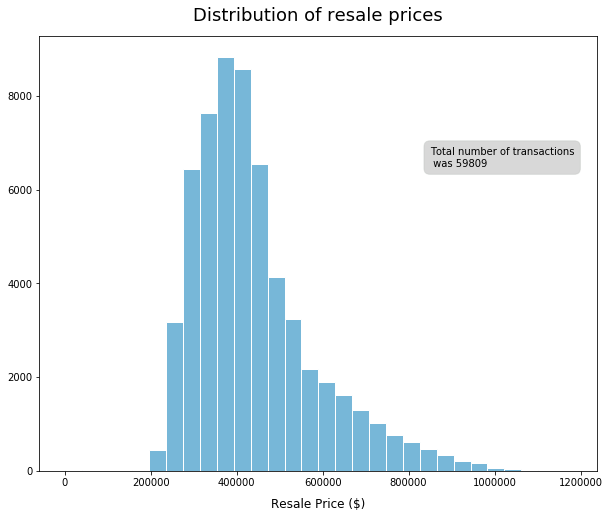

In [5]:
def create_histogram_user(df, selection_made):
    
    fig,ax = plt.subplots(figsize=(10,8))

    num_bins = 30
    
    ax.hist(df['resale_price'], bins=num_bins, edgecolor='white', color='#77B7D8')
    
    if selection_made=='all':
        ax.set_title("Distribution of resale prices")
    else:
        ax.set_title("Distribution of resale prices for {}".format(selection_made.title()))
    
    ax.set_xlabel("Resale Price ($)")
    
    #add text label
    textlabel = "Total number of transactions\n was {}".format(len(df))
    bbox_prop = dict(boxstyle="round, pad=0.6", fc="gray",ec='#AFB6B1', alpha=0.3)
    ax.text(0.7, 0.7, textlabel, transform=ax.transAxes, bbox=bbox_prop)
    
    plt.show()
    

#get user selection
while True:
    choice = int(input("Please select your histogram (enter number):\n1. By flat type\n2. By town\n3. Show all records"))
    
    if choice in [1,2,3]:
        if choice==3:
            create_histogram_user(data, 'all')
            break
        elif choice==1:
            selection = input("Enter a choice from {}".format([x for x in flattypes]))
            flattype = verify_flattype(selection.upper(),flattypes)
            if not flattype:
                print("\nYou have selected an invalid choice. ")
            else:
                df = data[data['flat_type']== flattype]
                create_histogram_user(df, flattype)
                break
        elif choice==2:
            selection = input("Enter the town")
            town = verify_town(selection.upper(), towns)
            if not town:
                print("\nYou have selected an invalid choice. ")
            else:
                df = data[data['town']== town]
                create_histogram_user(df, town)
                break   
    else:
        print("\nYou have selected an invalid choice. ")


# Create boxplots by room-type for specified town

Please enter a town or "All" to see boxplots for all transactions:bishan


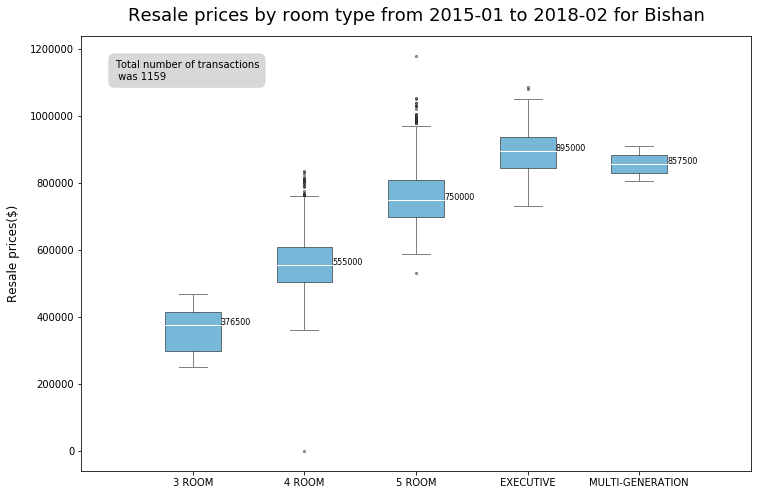

In [6]:
def create_boxplots_roomtype(df, start, end, town):
    
    fig,ax = plt.subplots(figsize=(12,8))

    #subset data if selection on town was made
    if town!='ALL':
        df = df[df['town']==town]
    
    xlabels = np.unique(df['flat_type'])
    prices = df['resale_price']
    
    #set boxplot aesthetics
    boxprops = dict(linestyle='-', linewidth=0.5, facecolor = '#77B7D8' )
    flierprops = dict(marker='o', markerfacecolor='gray', markersize = 2, linestyle='none', alpha = 0.5)
    medianprops = dict(linestyle='-', linewidth=1, color='white')
    whiskerprops=dict(color='gray', linewidth = 1)
    capprops=dict(color='gray', linewidth = 1)
    
    bp = ax.boxplot([prices[df['flat_type']==label] for label in xlabels], labels = xlabels,
              boxprops = boxprops, flierprops = flierprops, medianprops = medianprops,
                    whiskerprops = whiskerprops, capprops = capprops,
                    patch_artist=True, widths = 0.5)
    
    ax.set_title("Resale prices by room type from {} to {} for {}".format(start,end,town.title()))
    ax.set_ylabel("Resale prices($)")
    ax.set_xlim(0,len(xlabels)+1) #increase x scale to accomodate text labels
  
    for value in bp['medians']:
        x, y = value.get_xydata()[1] # top of median line
        ax.text(x, y, '{:.0f}'.format(y),horizontalalignment='left', fontsize = 8)
    
    #show total number of transactions for df plotted
    textlabel = "Total number of transactions\n was {}".format(len(df))
    bbox_prop = dict(boxstyle="round, pad=0.6", fc="gray",ec='#AFB6B1', alpha=0.3)
    ax.text(0.05, 0.9, textlabel, transform=ax.transAxes, bbox=bbox_prop)
    
    plt.show()

#get user input
while True:
    choice = input("Please enter a town or \"All\" to see boxplots for all transactions:")
    if choice.upper() in np.append(towns, 'ALL'):
        create_boxplots_roomtype(data, startdate, enddate, choice.upper())
        break
    else:
        print("Invalid choice.")
        

# Compare resale prices between towns specified by user

Please enter towns for boxplot, separated by comma (Up to 5):
Your choices are: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']ang mo kio, hougang, serangoon, sengkang, punggol


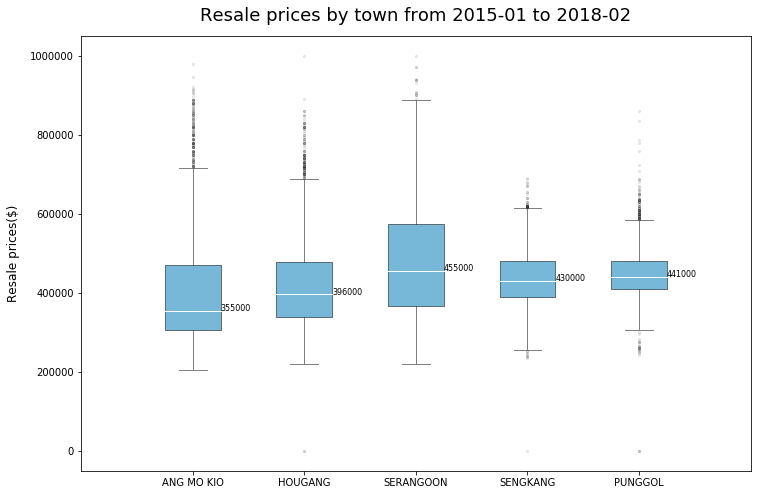

In [8]:
global num_allowed #global variable used in functions

num_allowed = 5 #specify maximum of towns that user can enter

#create boxplot function
def create_boxplots_towns_user(df, selection, start, end):
    
    fig,ax = plt.subplots(figsize=(12,8))

    xlabels = selection
    
    prices = df['resale_price']
    
    #set boxplot aesthetics
    boxprops = dict(linestyle='-', linewidth=0.5, facecolor = '#77B7D8' )
    flierprops = dict(marker='o', markerfacecolor='gray', markersize = 2, linestyle='none', alpha = 0.1)
    medianprops = dict(linestyle='-', linewidth=1, color='white')
    whiskerprops=dict(color='gray', linewidth = 1)
    capprops=dict(color='gray', linewidth = 1)
    
    bp = ax.boxplot([prices[df['town']==label] for label in xlabels], labels = xlabels, 
                    boxprops = boxprops, flierprops = flierprops, medianprops = medianprops,
                    whiskerprops = whiskerprops, capprops = capprops,
                    patch_artist=True, widths = 0.5)
    
    ax.set_title("Resale prices by town from {} to {}".format(start,end))
    ax.set_ylabel("Resale prices($)")
    ax.set_xlim(0,len(xlabels)+1)
    
    for value in bp['medians']:
        x, y = value.get_xydata()[1] # top of median line
        ax.text(x, y, '{:.0f}'.format(y),horizontalalignment='left', fontsize = 8)

    plt.show()

    
#verify town names exist and no duplicates
def verify_townlist(town_list, towns):
    
    for town in town_list:  # returns False if there are invalid town names
        if not verify_town(town, towns):
            return False    
        
    num_unique = len(np.unique(town_list))  
    if num_unique!=len(town_list):  # returns False if there are duplicates
        return False            
    else:
        return town_list  # returns townlist if all checks passed

#verify user input in correct format with correct number of towns
def check_input(selection, towns):
    try:
        town_list = [element.strip() for element in selection.split(',')]
        if len(town_list)>num_allowed: # returns False if user entered more than max number 
            return False
        else: 
            return verify_townlist(town_list, towns) # returns townlist if verify_townlist passed, False otherwise
        
    except: #returns False if not entered in the right format
        return False
   

# get user input and plot boxplots with error handling
while True: #keeps prompting user until valid choice entered
    selection = input("Please enter towns for boxplot, separated by comma (Up to {}):\nYour choices are: {}".format(num_allowed, towns))
    
    townlist = check_input(selection.upper(), towns)
    if not townlist:
        print("\nYou entered an invalid choice. ") 
    else:
        create_boxplots_towns_user(data,townlist,startdate,enddate)
        break
    

# Visualize resale price, lease remaining and floor area for transactions in user-defined data set

Please enter town for scatterplot 
Your choices are: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']hougan
Please enter flat type 
Your choices are ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
Enter "All" for allall

You entered an invalid choice. 
Please enter town for scatterplot 
Your choices are: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']hougang
Please enter flat type 
Your choices

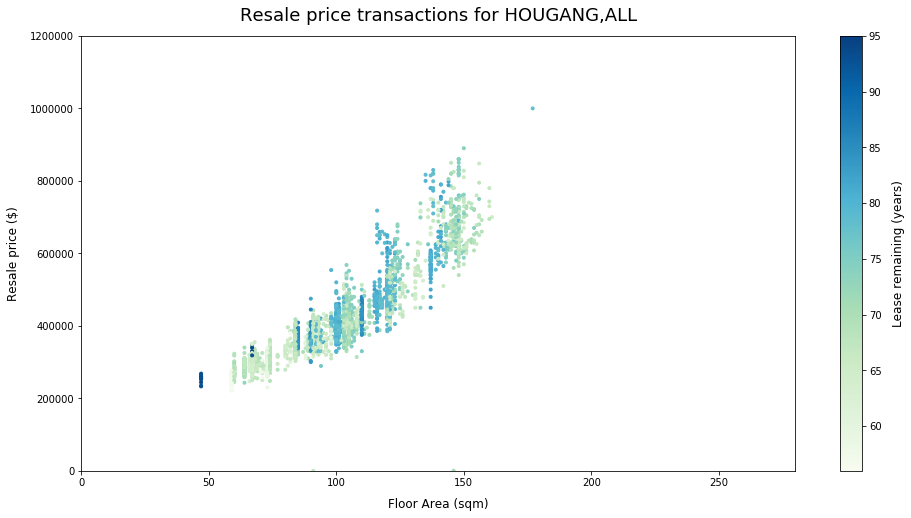

In [16]:
# plot the transactions selected town and/or flat type subset with variables resale price / lease / floor area
def scatter_3variables(df,start, end, town, flattype):
    
    fig, ax = plt.subplots(figsize=(16,8))
      
    resale = df['resale_price']
    floorarea = df['floor_area_sqm']
    lease = df['remaining_lease']
    colormap=cm.GnBu #set colormap for lease variable
    
    #plot floor area vs resale price for each transaction, color of marker depends on lease remaining                                  
    ax.scatter(floorarea, resale, c=lease, cmap=colormap, marker='.')   
 
    ax.set_title('Resale price transactions for {},{}'.format(town, flattype))
    ax.set_ylabel('Resale price ($)')
    ax.set_xlabel('Floor Area (sqm)')
    ax.set_xlim(0,280)
    ax.set_ylim(0,1200000)
   
    #plot colorbar for the lease variable
    normalize = mcolors.Normalize(vmin=np.min(lease), vmax=np.max(lease))
    for l in lease:
        plt.plot(color=colormap(normalize(l)))

    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(lease)
    cbar = plt.colorbar(scalarmappaple)
    cbar.ax.set_ylabel('Lease remaining (years)')
       
    plt.legend()
    plt.show()


# get user input on selected data to be plotted
while True: 
    selection_town = input("Please enter town for scatterplot \nYour choices are: {}".format(towns))
    selection_type = input("Please enter flat type \nYour choices are {}\nEnter \"All\" for all".format([x for x in flattypes]))
    
    #verify that selections are valid
    town = verify_town(selection_town.upper(), towns)
    flattype = verify_flattype(selection_type.upper(), flattypes)
   
    if not town:
        print("\nYou entered an invalid choice. ")
    elif not flattype:
        print("\nYou entered an invalid choice. ")
    else: #subsets data and plots data for valid choices made
        df = data[data['town']==town]
        if flattype != "ALL":
            df = df[df['flat_type']==flattype]
        try:
            scatter_3variables(df,startdate, enddate, town, flattype)
            break
        except: #try-except statements in case user selects non-existent data e.g. there are no 1-rooms in Sengkang
            print("The data does not exist.")
